# 해당 프로젝트에 대한 더 자세한 사항 및 코드를 확인하고 싶다면 아래의 깃헙 링크를 참고해주세요

Github으로 이동하려면 [여기를 클릭하세요](https://github.com/OhJisong/Olist-From-First-Purchase-to-Loyalty)

# 1단계: 데이터 불러오기 및 확인

In [1]:
import pandas as pd

# 데이터 파일 경로를 변수로 저장
customers_path = r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_customers_dataset.csv'
orders_path = r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_orders_dataset.csv'
order_items_path = r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_order_items_dataset.csv'
products_path = r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_products_dataset.csv'
payments_path = r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_order_payments_dataset.csv'
translation_path = r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\product_category_name_translation.csv'

# CSV 파일들을 pandas 데이터프레임으로 불러오기
customers = pd.read_csv(customers_path)
orders = pd.read_csv(orders_path)
order_items = pd.read_csv(order_items_path)
products = pd.read_csv(products_path)
payments = pd.read_csv(payments_path)
translation = pd.read_csv(translation_path)

# 각 데이터프레임의 첫 5줄을 출력하여 확인
print("--- Customers ---")
print(customers.head())
print("\n--- Orders ---")
print(orders.head())
print("\n--- Order Items ---")
print(order_items.head())
print("\n--- Products ---")
print(products.head())
print("\n--- Payments ---")
print(payments.head())
print("\n--- Category Name Translation ---")
print(translation.head())

--- Customers ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

--- Orders ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6

# 2단계: 데이터 병합 (Merge) 및 번역

In [2]:
# 1. orders와 customers 데이터를 'customer_id'를 기준으로 병합
df = pd.merge(orders, customers, on='customer_id', how='left')

# 2. 위 결과에 order_items 데이터를 'order_id'를 기준으로 병합
df = pd.merge(df, order_items, on='order_id', how='left')

# 3. 위 결과에 payments 데이터를 'order_id'를 기준으로 병합
df = pd.merge(df, payments, on='order_id', how='left')

# 4. 위 결과에 products 데이터를 'product_id'를 기준으로 병합
df = pd.merge(df, products, on='product_id', how='left')

# 5. 마지막으로, 카테고리 이름을 영어로 번역하기 위해 translation 데이터를 병합
df = pd.merge(df, translation, on='product_category_name', how='left')

# 병합된 데이터프레임의 정보 확인
print("--- Merged DataFrame Info ---")
# 데이터의 전체 행과 열 개수 출력
print("Shape:", df.shape)
# 데이터의 상위 5개 행 출력
print("\n--- Merged DataFrame Head ---")
print(df.head())

--- Merged DataFrame Info ---
Shape: (118434, 31)

--- Merged DataFrame Head ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00 

# 2.5단계: 병합 데이터 저장 (체크포인트)

In [3]:
# 병합된 데이터프레임을 CSV 파일로 저장
df.to_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\merged_data\olist_master_dataset.csv', index=False)

print("파일 저장 완료! 'olist_master_dataset.csv' 파일이 생성.")

파일 저장 완료! 'olist_master_dataset.csv' 파일이 생성.


# 3단계: 데이터 전처리 및 정제

In [4]:
# 1. 배송 완료된(delivered) 주문만 필터링
print(f"필터링 전 데이터 개수: {len(df)}")
df_cleaned = df[df['order_status'] == 'delivered'].copy()
print(f"필터링 후 데이터 개수: {len(df_cleaned)}")

# 2. 시간 관련 컬럼들을 datetime 형식으로 변환
time_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date', 
             'order_estimated_delivery_date', 'shipping_limit_date']

for col in time_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

# 3. 각 컬럼별로 비어있는(null) 데이터가 몇 개인지 확인
print("\n--- 결측치 확인 ---")
print(df_cleaned.isnull().sum())

필터링 전 데이터 개수: 118434
필터링 후 데이터 개수: 115038

--- 결측치 확인 ---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name            1628
product_name_lenght              1628
product_description_lenght    

# 4단계: 결측치 처리 및 첫 EDA
* 목표 :

    1. 분석에 필수적인 product_category_name_english, customer_unique_id 등의 열에 값이 없는 데이터는 과감하게 제거

    2.  **"Olist에서 가장 인기 있는 상품 카테고리는 무엇일까?"** -> 간단한 시각화(EDA)

--- 결측치 처리 후 정보 ---
처리 전 데이터 개수: 115038
처리 후 데이터 개수: 113384

--- 처리 후 결측치 재확인 ---
order_purchase_timestamp         0
customer_unique_id               0
product_category_name_english    0
payment_value                    0
dtype: int64


C:\Users\jso25\AppData\Local\Temp\ipykernel_19244\3355125486.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


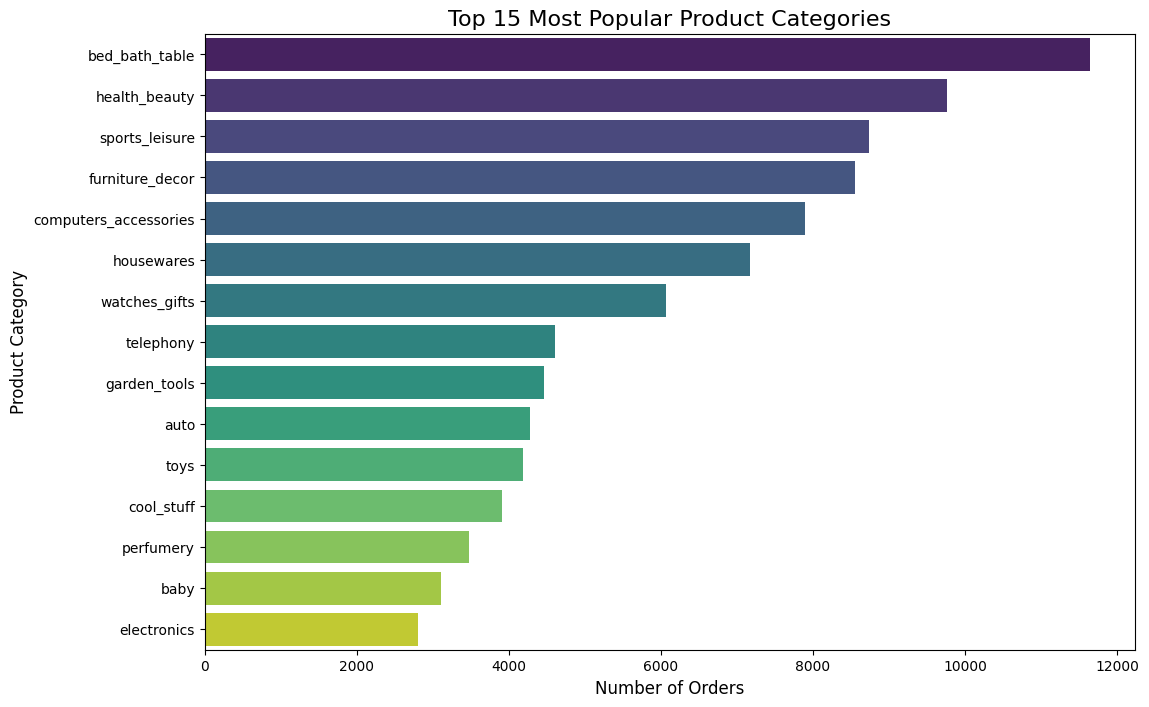

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석에 필수적인 컬럼에 결측치가 있는 행(row)을 제거
essential_cols = ['order_purchase_timestamp', 'customer_unique_id', 'product_category_name_english', 'payment_value']
df_processed = df_cleaned.dropna(subset=essential_cols)

print("--- 결측치 처리 후 정보 ---")
print(f"처리 전 데이터 개수: {len(df_cleaned)}")
print(f"처리 후 데이터 개수: {len(df_processed)}")
print("\n--- 처리 후 결측치 재확인 ---")
# 결측치가 모두 사라졌는지 다시 확인
print(df_processed[essential_cols].isnull().sum())


# 2. EDA: 상위 15개 상품 카테고리 시각화
plt.figure(figsize=(12, 8))
category_counts = df_processed['product_category_name_english'].value_counts().head(15)

# seaborn을 사용한 가로 막대 그래프
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')

plt.title('Top 15 Most Popular Product Categories', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

# 4.5단계: 심화 EDA

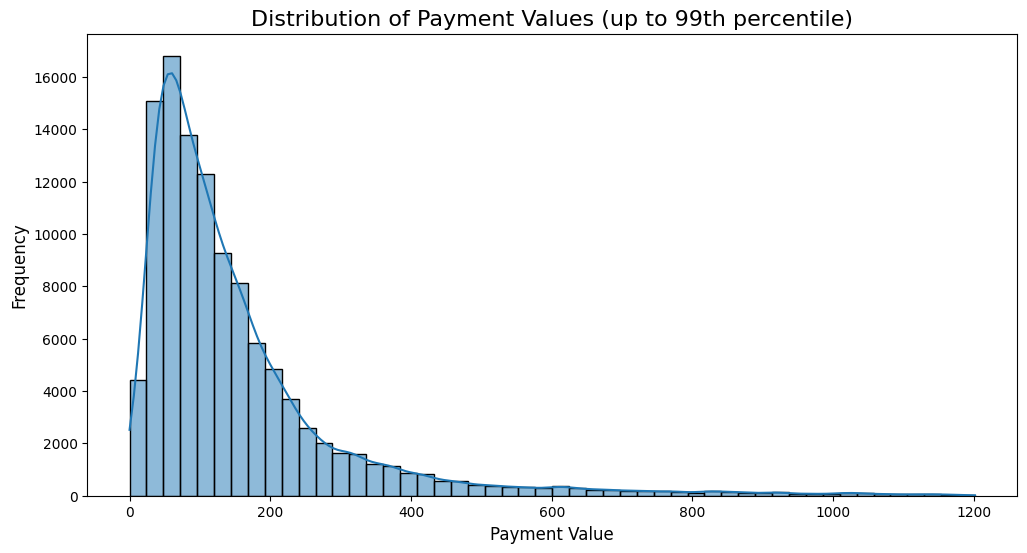

C:\Users\jso25\AppData\Local\Temp\ipykernel_19244\3086071189.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['order_month'] = df_processed['order_purchase_timestamp'].dt.to_period('M')


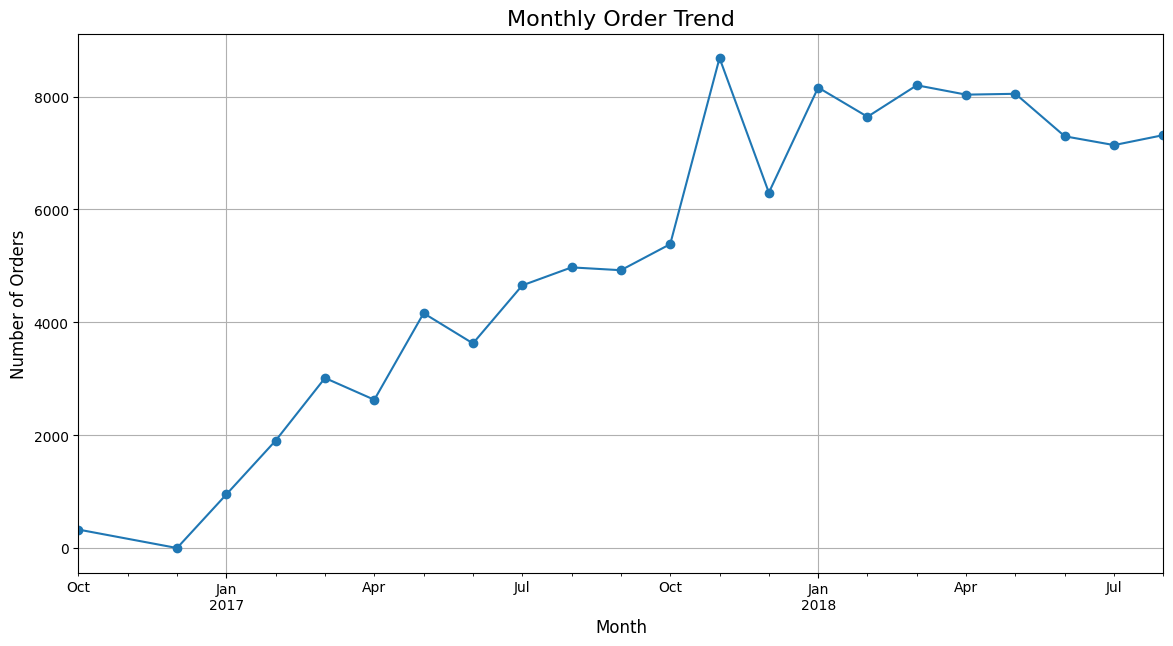

In [ ]:
# EDA 2: 결제 금액 분포 확인 (Histogram)
plt.figure(figsize=(12, 6))
# 너무 큰 금액(이상치) 때문에 분포가 잘 보이지 않는 것을 방지하기 위해 99퍼센타일 값으로 제한
quantile_99 = df_processed['payment_value'].quantile(0.99)
sns.histplot(df_processed[df_processed['payment_value'] < quantile_99]['payment_value'], bins=50, kde=True)
plt.title('Distribution of Payment Values (up to 99th percentile)', fontsize=16)
plt.xlabel('Payment Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# EDA 3: 월별 주문 트렌드 확인 (Line Plot)
# 'order_purchase_timestamp'에서 연도-월 정보만 추출하여 새로운 컬럼 생성
df_processed['order_month'] = df_processed['order_purchase_timestamp'].dt.to_period('M')

# 월별 주문 건수 계산
monthly_order_counts = df_processed['order_month'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
monthly_order_counts.plot(kind='line', marker='o')
plt.title('Monthly Order Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True)
plt.show()

# 5단계 : 재구매 고객 식별 및 구매 시퀀스 생성 코드

* 목표 : 이 모든 고객들 중에서 "충성 고객"들은 과연 어떤 사람들이고 그들은 어떤 순서로 쇼핑을 하였는지

In [7]:
# 1. 재구매 고객 식별
# customer_unique_id 별로 구매(order_id)가 몇 번 있었는지 계산
purchase_counts = df_processed.groupby('customer_unique_id')['order_id'].nunique()
# 구매 횟수가 2번 이상인 고객(재구매 고객)의 ID만 추출
repeat_customer_ids = purchase_counts[purchase_counts > 1].index

# 원본 데이터에서 재구매 고객의 데이터만 필터링
df_repeat = df_processed[df_processed['customer_unique_id'].isin(repeat_customer_ids)]

print(f"전체 고객 수: {df_processed['customer_unique_id'].nunique()}")
print(f"재구매 고객 수: {len(repeat_customer_ids)}")
print(f"재구매율: {len(repeat_customer_ids) / df_processed['customer_unique_id'].nunique() * 100:.2f}%")


# 2. 고객별 구매 시퀀스 생성
# 고객 ID와 구매 시간을 기준으로 데이터를 정렬
df_repeat_sorted = df_repeat.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# 각 고객별로 구매한 상품 카테고리를 시간 순서대로 리스트에 담기
purchase_journey = df_repeat_sorted.groupby('customer_unique_id')['product_category_name_english'].apply(list)

print("\n--- 고객별 구매 여정 (상위 5개) ---")
print(purchase_journey.head())

# 생성된 구매 여정(시퀀스) 데이터의 개수 확인
print(f"\n총 {len(purchase_journey)}명의 재구매 고객에 대한 구매 여정이 생성되었습니다.")

전체 고객 수: 92078
재구매 고객 수: 2742
재구매율: 2.98%

--- 고객별 구매 여정 (상위 5개) ---
customer_unique_id
004288347e5e88a27ded2bb23747066c    [cool_stuff, luggage_accessories]
00a39521eb40f7012db50455bf083460        [sports_leisure, electronics]
00cc12a6d8b578b8ebd21ea4e2ae8b27    [home_appliances, bed_bath_table]
011575986092c30523ecb71ff10cb473          [toys, musical_instruments]
011b4adcd54683b480c4d841250a987f         [sports_leisure, food, food]
Name: product_category_name_english, dtype: object

총 2742명의 재구매 고객에 대한 구매 여정이 생성되었습니다.


## 5단계 시각화

In [ ]:
import plotly.graph_objects as go

# 1. 재구매/비재구매 고객 수 계산
repeat_counts = df_gateway_analysis['is_repeat'].value_counts()
labels = ['One-time Customers (97%)', 'Repeat Customers (3%)']
values = [repeat_counts[False], repeat_counts[True]]

# 2. 도넛 차트 생성
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=.4,  
    marker_colors=['lightgray', '#636EFA'], # 비재구매는 회색, 재구매는 강조색
    pull=[0, 0.1] 
)])

fig.update_layout(
    title_text="<b>전체 고객 중 재구매 고객 비율 (단 3%)</b>",
    title_x=0.5,
    annotations=[dict(text='Total<br>Customers', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

# 6단계: 고객 여정 분석 (전환 관계 추출)

purchase_journey 데이터를 분석 -> 첫 구매 카테고리(Source)와 두 번째 구매 카테고리(Target) 사이의 모든 전환 관계와 그 횟수(Value)를 추출

In [8]:
# 1. 첫 구매 -> 두 번째 구매 전환 관계를 담을 리스트 생성
transitions = []
for journey in purchase_journey:
    # 구매 여정에 최소 2개 이상의 상품이 있어야 전환 관계 추출 가능
    if len(journey) > 1:
        source = journey[0]
        target = journey[1]
        transitions.append((source, target))

# 2. 전환 관계 리스트를 데이터프레임으로 변환
df_transitions = pd.DataFrame(transitions, columns=['source', 'target'])

# 3. 각 전환 관계가 몇 번 발생했는지 빈도 계산
df_sankey = df_transitions.groupby(['source', 'target']).size().reset_index(name='value')

# 4. 가장 빈번하게 발생한 전환 관계 상위 15개 출력
print("--- First to Second Purchase Transitions (Top 15) ---")
print(df_sankey.sort_values(by='value', ascending=False).head(15))

--- First to Second Purchase Transitions (Top 15) ---
                       source                    target  value
63             bed_bath_table            bed_bath_table    244
509            sports_leisure            sports_leisure    173
326             health_beauty             health_beauty    148
265           furniture_decor           furniture_decor    143
107     computers_accessories     computers_accessories    127
378                housewares                housewares     75
594             watches_gifts             watches_gifts     61
203  fashion_bags_accessories  fashion_bags_accessories     56
343           home_appliances           home_appliances     50
545                 telephony                 telephony     49
23                       auto                      auto     45
303              garden_tools              garden_tools     40
449                 perfumery                 perfumery     38
72             bed_bath_table           furniture_decor     36
5

# 7단계: 고객 여정 시각화 (Sankey Diagram)

* 6단계에서 만든 df_sankey 데이터 -> 고객들이 첫 구매에서 두 번째 구매로 어떻게 흘러가는지를 유량 그래프(Sankey Diagram)로 시각화

In [ ]:
import plotly.graph_objects as go

# 시각화를 위해 상위 30개의 전환 관계만 사용
df_sankey_top = df_sankey.sort_values(by='value', ascending=False).head(30)

# 1. Plotly Sankey가 요구하는 데이터 형식으로 변환
unique_labels = list(pd.concat([df_sankey_top['source'], df_sankey_top['target']]).unique())

# 각 카테고리 이름을 숫자 인덱스로 변환
df_sankey_top['source_idx'] = df_sankey_top['source'].apply(lambda x: unique_labels.index(x))
df_sankey_top['target_idx'] = df_sankey_top['target'].apply(lambda x: unique_labels.index(x))


# 2. Sankey 다이어그램 생성
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_labels, 
      color = "blue"
    ),
    link = dict(
      source = df_sankey_top['source_idx'], 
      target = df_sankey_top['target_idx'], 
      value = df_sankey_top['value']      # 연결선의 두께 (전환 횟수)
  ))])

fig.update_layout(title_text="Customer Journey: From First to Second Purchase", font_size=12)
fig.show()

## 7(1) 시각화 보충

In [64]:
import networkx as nx
import plotly.graph_objects as go

# 1. 구매 여정 데이터 생성 (첫 구매 -> 두 번째 구매)
df_cleaned_sorted = df_cleaned.sort_values(['customer_unique_id', 'order_purchase_timestamp'])
df_cleaned_sorted['next_purchase_category'] = df_cleaned_sorted.groupby('customer_unique_id')['product_category_name_english'].shift(-1)
purchase_journey = df_cleaned_sorted.dropna(subset=['next_purchase_category'])

# 2. 상위 구매 경로 추출 (상위 20개 경로만 시각화하여 단순화)
top_journeys = purchase_journey.groupby(['product_category_name_english', 'next_purchase_category']).size().nlargest(20).reset_index(name='counts')
top_journeys.columns = ['source', 'target', 'weight']

# 3. 네트워크 그래프 생성
G = nx.from_pandas_edgelist(top_journeys, 'source', 'target', 'weight', create_using=nx.DiGraph())

# 4. Plotly를 사용한 시각화
pos = nx.spring_layout(G, k=0.9, iterations=50)

edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x, node_y = [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'{adjacencies[0]}<br># of connections: {len(adjacencies[1])}')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=[node[:10]+'...' if len(node) > 10 else node for node in G.nodes()],
    textposition="bottom center",
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        reversescale=True,
        color=node_adjacencies,
        size=15,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            title_side='right'
        ),
        line_width=2))

# 5. 그래프 출력
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br><b>Top 20 Customer Purchase Journeys Network</b>',
                # ★★★ 'titlefont_size' -> 'title_font_size'로 수정 ★★★
                title_font_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

## 7(2) 시각화 보충

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# 1. 구매 여정 데이터
df_cleaned_sorted = df_cleaned.sort_values(['customer_unique_id', 'order_purchase_timestamp'])
df_cleaned_sorted['next_purchase_category'] = df_cleaned_sorted.groupby('customer_unique_id')['product_category_name_english'].shift(-1)
purchase_journey = df_cleaned_sorted.dropna(subset=['next_purchase_category'])

# 2. 가장 중요한 '관문 상품' Top 5 선정 (재구매율 기준)
# final_kpi_table은 이전에 생성했습니다.
top_5_gateway_categories = final_kpi_table.sort_values('conversion_rate', ascending=False).head(5)['product_category_name_english'].tolist()

# 3. Top 5 관문 상품에서 시작하는 구매 흐름만 필터링
filtered_journey = purchase_journey[purchase_journey['product_category_name_english'].isin(top_5_gateway_categories)]

# 4. 가장 빈번한 구매 경로 Top 10 추출
top_journeys = filtered_journey.groupby(['product_category_name_english', 'next_purchase_category']).size().nlargest(10).reset_index(name='counts')
top_journeys.columns = ['source', 'target', 'value']

# 5. Sankey Diagram을 위한 데이터 준비
all_nodes = pd.concat([top_journeys['source'], top_journeys['target']]).unique()
node_map = {node: i for i, node in enumerate(all_nodes)}

top_journeys['source_id'] = top_journeys['source'].map(node_map)
top_journeys['target_id'] = top_journeys['target'].map(node_map)

# 6. Plotly로 Sankey Diagram 생성
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=all_nodes,
      color="royalblue"
    ),
    link=dict(
      source=top_journeys['source_id'],
      target=top_journeys['target_id'],
      value=top_journeys['value'],
      label=top_journeys.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1)
  ))])

fig.update_layout(
    title_text="<b>Top 5 'Gateway' Products Customer Journey</b><br><sup>(Where do customers go after their first key purchase?)</sup>",
    font_size=12
)

fig.show()

## 7(3) 시각화 보충

In [ ]:
import plotly.express as px
import pandas as pd

# 1. 구매 여정 데이터 생성
df_cleaned_sorted = df_cleaned.sort_values(['customer_unique_id', 'order_purchase_timestamp'])
df_cleaned_sorted['next_purchase_category'] = df_cleaned_sorted.groupby('customer_unique_id')['product_category_name_english'].shift(-1)
purchase_journey = df_cleaned_sorted.dropna(subset=['next_purchase_category'])

# 2. 가장 중요한 '관문 상품' Top 7 선정 
top_7_gateway_categories = final_kpi_table.sort_values('conversion_rate', ascending=False).head(7)['product_category_name_english'].tolist()

# 3. Top 7 관문 상품에서 시작하는 구매 흐름만 필터링
filtered_journey = purchase_journey[purchase_journey['product_category_name_english'].isin(top_7_gateway_categories)]

# 4. 구매 경로를 Pivot Table 형태로 변환
journey_pivot = filtered_journey.groupby(['product_category_name_english', 'next_purchase_category']).size().reset_index(name='counts')
journey_pivot = journey_pivot.pivot_table(index='product_category_name_english', columns='next_purchase_category', values='counts', aggfunc='sum').fillna(0)

# 5. Plotly로 Heatmap 생성
fig = px.imshow(
    journey_pivot,
    text_auto=True, # 각 셀에 숫자 표시
    aspect="auto",  # 이미지 비율 자동 조정
    color_continuous_scale='Blues', # 색상 테마
    labels=dict(x="Second Purchase Category", y="First Purchase ('Gateway') Category", color="Number of Customers")
)

fig.update_layout(
    title_text="<b>Customer Purchase Journey Heatmap</b><br><sup>(From Top 7 'Gateway' Products)</sup>",
    xaxis_title="두 번째 구매 카테고리",
    yaxis_title="첫 번째 구매 (관문) 카테고리"
)

fig.show()

# 8단계: 최고의 '관문 상품' 발굴 (핵심 지표 계산)

* 목표: 

    1. 첫 구매 카테고리별로 아래의 3가지 핵심 지표(KPI)를 계산 -> 어떤 카테고리가 장기적으로 더 가치 있는 고객을 유치하는지 평가

    2. 재구매 전환율: 이 카테고리로 시작한 고객 중 재구매를 한 비율

    3. 평균 고객 생애 가치(LTV): 이 카테고리로 시작한 고객들의 평균 총구매액
    
    4. 평균 재구매 소요 시간: 첫 구매 후 두 번째 구매까지 걸리는 평균 시간

In [ ]:
# 1. 각 고객의 첫 구매 정보 추출
first_purchase_idx = df_processed.groupby('customer_unique_id')['order_purchase_timestamp'].idxmin()
first_purchase = df_processed.loc[first_purchase_idx].copy()

# 2. 각 고객의 LTV(총 구매액) 계산
customer_ltv = df_processed.groupby('customer_unique_id')['payment_value'].sum().reset_index()
customer_ltv.rename(columns={'payment_value': 'ltv'}, inplace=True)

# 3. 첫 구매 정보와 LTV 데이터 병합
df_first_purchase_ltv = pd.merge(first_purchase, customer_ltv, on='customer_unique_id')

# 4. 재구매 고객 여부(True/False) 표시
purchase_counts = df_processed.groupby('customer_unique_id')['order_id'].nunique()
repeat_flags = purchase_counts > 1
repeat_flags.name = 'is_repeat'
df_gateway_analysis = pd.merge(df_first_purchase_ltv, repeat_flags, on='customer_unique_id')

# 5. 첫 번째 테이블(gateway_kpi) 생성
gateway_kpi = df_gateway_analysis.groupby('product_category_name_english').agg(
    total_customers=('customer_unique_id', 'nunique'),
    repeat_customers=('is_repeat', lambda x: x.sum()),
    avg_ltv=('ltv', 'mean')
).reset_index()
gateway_kpi['conversion_rate'] = gateway_kpi['repeat_customers'] / gateway_kpi['total_customers']


# 6. KPI 3: 평균 재구매 소요 시간 계산
df_repeat_sorted = df_processed[df_processed['customer_unique_id'].isin(repeat_customer_ids)].copy()
df_repeat_sorted['purchase_rank'] = df_repeat_sorted.groupby('customer_unique_id')['order_purchase_timestamp'].rank(method='first')

# 각 고객의 첫 번째와 두 번째 구매 기록만 추출
df_first_two_purchases = df_repeat_sorted[df_repeat_sorted['purchase_rank'].isin([1, 2])]

pivoted_times = df_first_two_purchases.pivot_table(index='customer_unique_id',
                                                   columns='purchase_rank',
                                                   values='order_purchase_timestamp').reset_index()
pivoted_times.columns = ['customer_unique_id', 'first_purchase_time', 'second_purchase_time']

# 재구매까지 걸린 시간
pivoted_times['time_to_repurchase_days'] = (pivoted_times['second_purchase_time'] - pivoted_times['first_purchase_time']).dt.days

# 첫 구매 카테고리 정보와 병합
time_with_category = pd.merge(pivoted_times[['customer_unique_id', 'time_to_repurchase_days']],
                                first_purchase[['customer_unique_id', 'product_category_name_english']],
                                on='customer_unique_id')

# 카테고리별 평균 재구매 소요 시간을 계산
avg_time_to_repurchase = time_with_category.groupby('product_category_name_english')['time_to_repurchase_days'].mean().reset_index()


# 7. 최종 KPI 테이블 병합
final_kpi_table = pd.merge(gateway_kpi, avg_time_to_repurchase, on='product_category_name_english', how='left')

# 분석의 신뢰도를 위해 최소 30명 이상의 고객이 시작한 카테고리만 필터링
final_kpi_table = final_kpi_table[final_kpi_table['total_customers'] >= 30]


print("--- First-Purchase Category KPI Table ---")
# LTV가 높은 순으로 정렬하여 상위 15개 출력
print(final_kpi_table.sort_values(by='avg_ltv', ascending=False).head(15))

--- First-Purchase Category KPI Table ---
              product_category_name_english  total_customers  \
14                                computers              173   
34                          fixed_telephony              207   
64    small_appliances_home_oven_and_coffee               71   
0                agro_industry_and_commerce              174   
45                        home_appliances_2              216   
57                         office_furniture             1223   
62                   signaling_and_security              135   
19                construction_tools_safety              149   
1                          air_conditioning              235   
56                      musical_instruments              597   
63                         small_appliances              594   
38                        furniture_bedroom               83   
40                    furniture_living_room              389   
17          construction_tools_construction              706  

# 9단계: '관문 점수' 산출 및 시각화

C:\Users\jso25\AppData\Local\Temp\ipykernel_19244\3447840749.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\jso25\AppData\Local\Temp\ipykernel_19244\3447840749.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




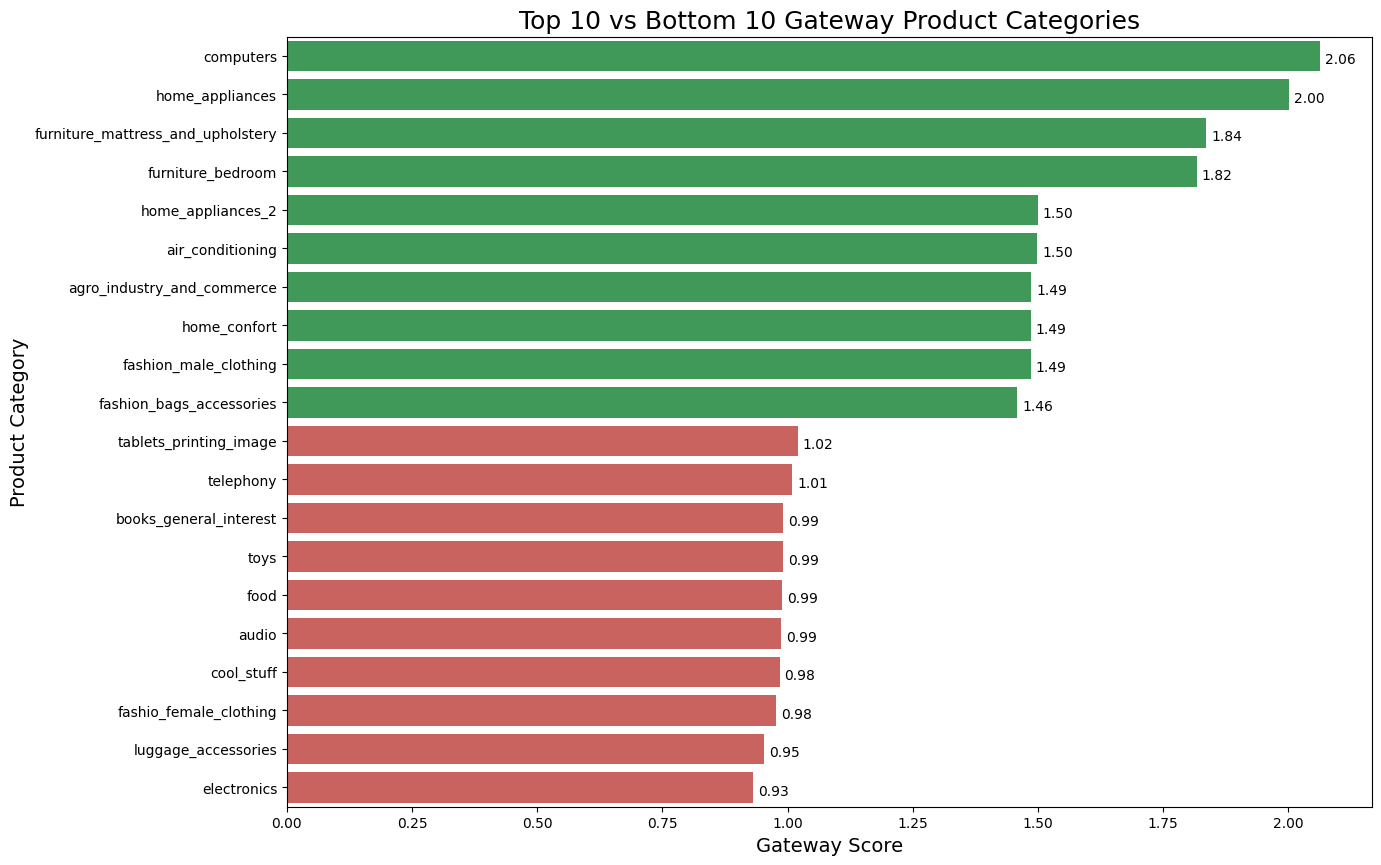

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

final_kpi_table['time_to_repurchase_days'].fillna(0, inplace=True)

# 1. KPI 정규화 (0~1 사이의 점수로 변환)
# 각 지표에서 최소값을 뺀 후, (최대값 - 최소값)으로 나눔
final_kpi_table['ltv_score'] = (final_kpi_table['avg_ltv'] - final_kpi_table['avg_ltv'].min()) / \
                              (final_kpi_table['avg_ltv'].max() - final_kpi_table['avg_ltv'].min())
final_kpi_table['conversion_score'] = (final_kpi_table['conversion_rate'] - final_kpi_table['conversion_rate'].min()) / \
                                      (final_kpi_table['conversion_rate'].max() - final_kpi_table['conversion_rate'].min())
# 재구매 소요 시간은 짧을수록 좋으므로, 1에서 빼주어 점수를 반전시킴
time_score = (final_kpi_table['time_to_repurchase_days'] - final_kpi_table['time_to_repurchase_days'].min()) / \
             (final_kpi_table['time_to_repurchase_days'].max() - final_kpi_table['time_to_repurchase_days'].min())
final_kpi_table['time_score'] = 1 - time_score


# 2. '관문 점수(Gateway Score)' 계산
final_kpi_table['gateway_score'] = final_kpi_table['ltv_score'] + final_kpi_table['conversion_score'] + final_kpi_table['time_score']


# 3. 시각화 준비
gateway_score_sorted = final_kpi_table.sort_values(by='gateway_score', ascending=False)
top_10 = gateway_score_sorted.head(10)
bottom_10 = gateway_score_sorted.tail(10)
combined_chart_data = pd.concat([top_10, bottom_10])


# 4. 막대그래프 시각화
plt.figure(figsize=(14, 10))
colors = ['#32a852' if x >= top_10['gateway_score'].min() else '#d9534f' for x in combined_chart_data['gateway_score']]
barplot = sns.barplot(x='gateway_score', y='product_category_name_english', data=combined_chart_data, palette=colors)
plt.title('Top 10 vs Bottom 10 Gateway Product Categories', fontsize=18)
plt.xlabel('Gateway Score', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# 막대 위에 점수 표시
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height()/2. + 0.2,
             '{:1.2f}'.format(width),
             ha="left")

plt.show()

In [30]:
# 9단계 결과물을 CSV 파일로 저장
final_kpi_table.to_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\dashboard\final_kpi_table.csv', index=False)

print("'final_kpi_table.csv' 파일 저장이 완료되었습니다!")

'final_kpi_table.csv' 파일 저장이 완료되었습니다!


# 10단계: 모델링을 위한 데이터 준비

In [12]:
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

# 1. 모델 학습에 필요한 feature들을 'first_purchase' 테이블에서 선택
features = first_purchase[[
    'customer_unique_id',
    'product_category_name_english',
    'payment_value',
    'payment_installments',
    'customer_state'
]].copy()

# 2. 타겟 변수 생성: 180일 내 재구매 여부
# 재구매 고객들의 첫 구매와 두 번째 구매 시간 데이터가 있는 'pivoted_times' 활용
target_data = pivoted_times[['customer_unique_id', 'second_purchase_time']].copy()
# 첫 구매 시간을 'first_purchase' 테이블에서 가져와 합치기
target_data = pd.merge(target_data, first_purchase[['customer_unique_id', 'order_purchase_timestamp']], on='customer_unique_id')
target_data.rename(columns={'order_purchase_timestamp': 'first_purchase_time'}, inplace=True)

# 첫 구매 후 180일이 되는 시점 계산
target_data['180_days_after_first_purchase'] = target_data['first_purchase_time'] + timedelta(days=180)

# 두 번째 구매가 180일 이내에 일어났는지 여부(True/False)를 계산하여 타겟 변수('target') 생성
target_data['target'] = target_data['second_purchase_time'] <= target_data['180_days_after_first_purchase']

# 3. feature 테이블과 target 테이블 병합
# 모든 첫 구매 고객을 기준으로 하되, 재구매 안 한 고객은 target 값이 없으므로 False로 채움
modeling_df = pd.merge(features, target_data[['customer_unique_id', 'target']], on='customer_unique_id', how='left')
modeling_df['target'].fillna(False, inplace=True)


# 결과 확인
print("--- Modeling DataFrame ---")
print(modeling_df.head())
print("\n--- Target Distribution ---")
print(modeling_df['target'].value_counts())

--- Modeling DataFrame ---
                 customer_unique_id product_category_name_english  \
0  0000366f3b9a7992bf8c76cfdf3221e2                bed_bath_table   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                 health_beauty   
2  0000f46a3911fa3c0805444483337064                    stationery   
3  0000f6ccb0745a6a4b88665a16c9f078                     telephony   
4  0004aac84e0df4da2b147fca70cf8255                     telephony   

   payment_value  payment_installments customer_state  target  
0         141.90                   8.0             SP   False  
1          27.19                   1.0             SP   False  
2          86.22                   8.0             SC   False  
3          43.62                   4.0             PA   False  
4         196.89                   6.0             SP   False  

--- Target Distribution ---
target
False    89734
True      2344
Name: count, dtype: int64


# 11단계: 모델 훈련 및 성능 비교

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# 1. 데이터 준비: 피처(X)와 타겟(y) 분리
X = modeling_df.drop(['customer_unique_id', 'target'], axis=1)
y = modeling_df['target']

# 2. 전처리 파이프라인 설정
# 숫자 피처와 범주형 피처를 구분
numeric_features = ['payment_value', 'payment_installments']
categorical_features = ['product_category_name_english', 'customer_state']

# 숫자 피처는 스케일링, 범주형 피처는 원-핫 인코딩 적용
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# 3. 훈련용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. 모델 훈련 및 평가
# 모델 1: 로지스틱 회귀 (기준 모델)
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# 모델 2: 랜덤 포레스트
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


# 5. 결과 출력
print("---------- Logistic Regression (Baseline Model) ----------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

print("\n---------- Random Forest Model ----------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

---------- Logistic Regression (Baseline Model) ----------
Accuracy: 0.6066
              precision    recall  f1-score   support

       False       0.98      0.61      0.75     26921
        True       0.04      0.58      0.07       703

    accuracy                           0.61     27624
   macro avg       0.51      0.59      0.41     27624
weighted avg       0.96      0.61      0.73     27624


---------- Random Forest Model ----------
Accuracy: 0.9532
              precision    recall  f1-score   support

       False       0.97      0.98      0.98     26921
        True       0.03      0.03      0.03       703

    accuracy                           0.95     27624
   macro avg       0.50      0.50      0.50     27624
weighted avg       0.95      0.95      0.95     27624



--- Model Performance Comparison Table ---


,ROC AUC Score,Recall (재현율),Precision (정밀도),F1-Score
Model,,,,
Logistic Regression,0.6433,0.5835,0.2166,0.3159
Random Forest,0.6939,0.1876,0.4413,0.2633
XGBoost,0.7326,0.5649,0.3072,0.3979


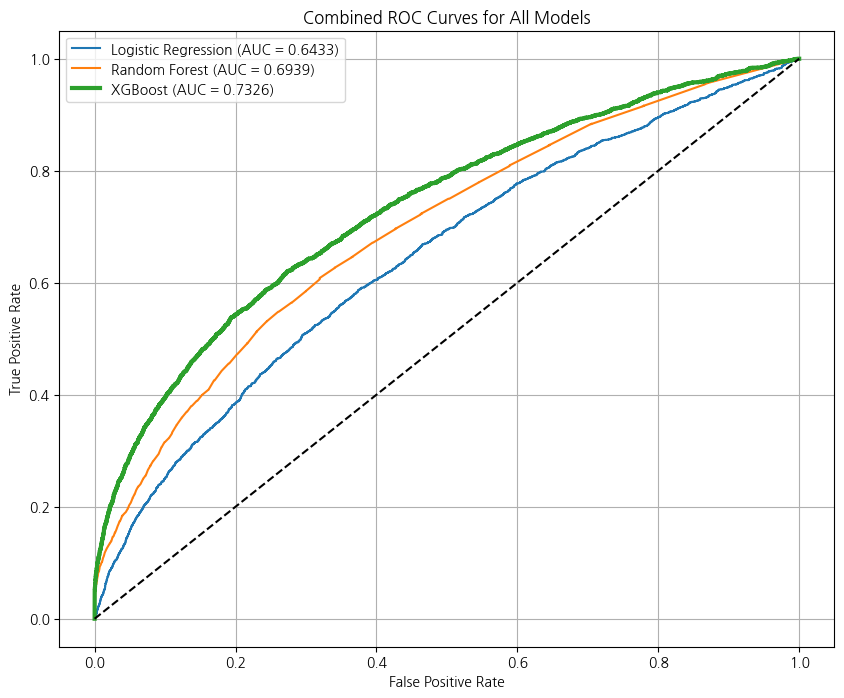

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
import plotly.graph_objects as go

# --- 이전 모델 재학습 (공정한 비교를 위해 최종 데이터셋 사용) ---

# 1. 로지스틱 회귀 파이프라인
lr_classifier = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lr_classifier)])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# 2. 랜덤 포레스트 파이프라인
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_classifier)])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# XGBoost 모델은 이미 xgb_pipeline, y_pred_xgb, y_proba_xgb로 학습됨

# --- 1. 종합 성능 비교표 생성 ---
performance_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'ROC AUC Score': [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ],
    'Recall (재현율)': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'Precision (정밀도)': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}
performance_df = pd.DataFrame(performance_data).set_index('Model')
print("--- Model Performance Comparison Table ---")
display(performance_df.style.format("{:.4f}").background_gradient(cmap='viridis'))


# --- 2. 핵심 지표 비교 막대그래프 (Plotly) ---
fig_bar = go.Figure(data=[
    go.Bar(name='Recall', x=performance_df.index, y=performance_df['Recall (재현율)']),
    go.Bar(name='F1-Score', x=performance_df.index, y=performance_df['F1-Score'])
])
fig_bar.update_layout(
    title='Model Comparison: Recall & F1-Score',
    yaxis_title='Score',
    barmode='group'
)
fig_bar.show()


# --- 3. 통합 ROC Curve 그래프 (Matplotlib) ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {performance_df.loc["Logistic Regression"]["ROC AUC Score"]:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {performance_df.loc["Random Forest"]["ROC AUC Score"]:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {performance_df.loc["XGBoost"]["ROC AUC Score"]:.4f})', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for All Models')
plt.legend()
plt.grid()
plt.show()

# 12단계: 모델 결과 시각화 및 피처 중요도 분석

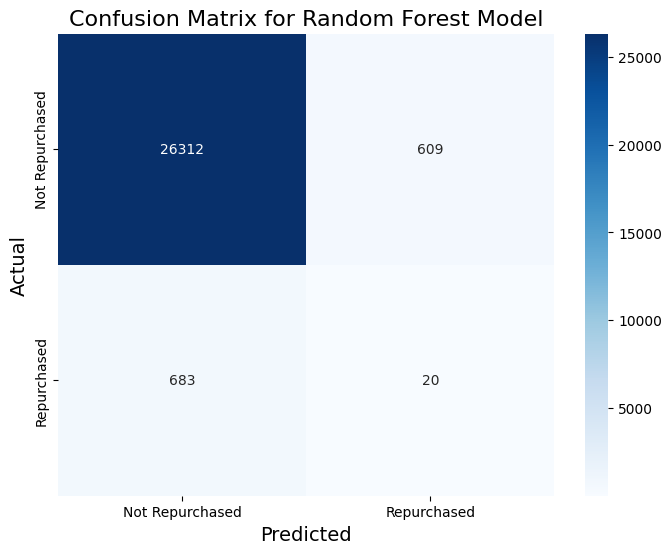

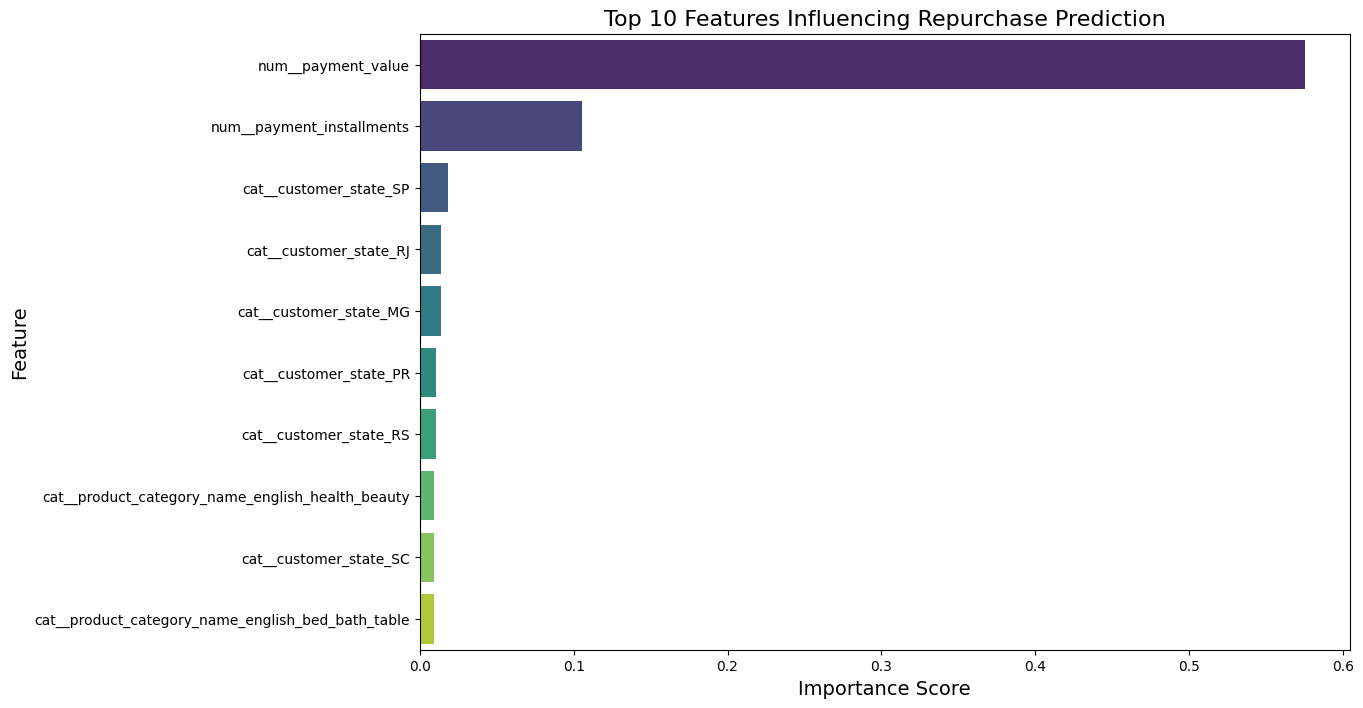

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. 혼동 행렬(Confusion Matrix) 시각화
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Repurchased', 'Repurchased'], 
            yticklabels=['Not Repurchased', 'Repurchased'])
plt.title('Confusion Matrix for Random Forest Model', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()


# 2. 피처 중요도(Feature Importance) 추출 및 시각화
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame(importances, index=feature_names, columns=['importance'])
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# 상위 10개 피처 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importance_df.head(10).index, data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Influencing Repurchase Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

# 13단계 (Advanced): SHAP으로 모델 해석하기

In [ ]:
import joblib
import pandas as pd

print("SHAP 분석에 필요한 데이터(X_train_processed_df)를 생성 중입니다...")

X_train_processed = rf_pipeline.named_steps['preprocessor'].transform(X_train)
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
X_train_processed_df = pd.DataFrame(X_train_processed.toarray(), columns=feature_names)
print("생성 완료!")

# 1. 최종 모델 파이프라인 저장
joblib.dump(rf_pipeline, 'random_forest_pipeline.joblib')

# 2. SHAP 분석에 필요한 전처리된 데이터 저장
X_train_processed_df.to_csv('X_train_processed_for_shap.csv', index=False)

# 3. SHAP 분석에 필요한 모델만 따로 저장
joblib.dump(rf_pipeline.named_steps['classifier'], 'random_forest_classifier.joblib')

print("\n--- 저장 완료 ---")
print("1. 모델 파이프라인: 'random_forest_pipeline.joblib'")
print("2. SHAP 분석용 데이터: 'X_train_processed_for_shap.csv'")
print("3. SHAP 분석용 모델: 'random_forest_classifier.joblib'")

SHAP 분석에 필요한 데이터(X_train_processed_df)를 생성 중입니다...
생성 완료!

--- 저장 완료 ---
1. 모델 파이프라인: 'random_forest_pipeline.joblib'
2. SHAP 분석용 데이터: 'X_train_processed_for_shap.csv'
3. SHAP 분석용 모델: 'random_forest_classifier.joblib'

이제 정말 진짜로 안심하고 주무셔도 됩니다! :)


In [ ]:
import pandas as pd
import joblib
import shap

# --- 저장된 파일들 불러오기 ---
print("저장된 모델과 데이터를 불러오는 중입니다...")
X_train_processed_df = pd.read_csv('X_train_processed_for_shap.csv')
rf_classifier = joblib.load('random_forest_classifier.joblib')
print("불러오기 완료!")


--- SHAP Summary Plot (Stable Version) ---
SHAP 그래프를 생성 중입니다...


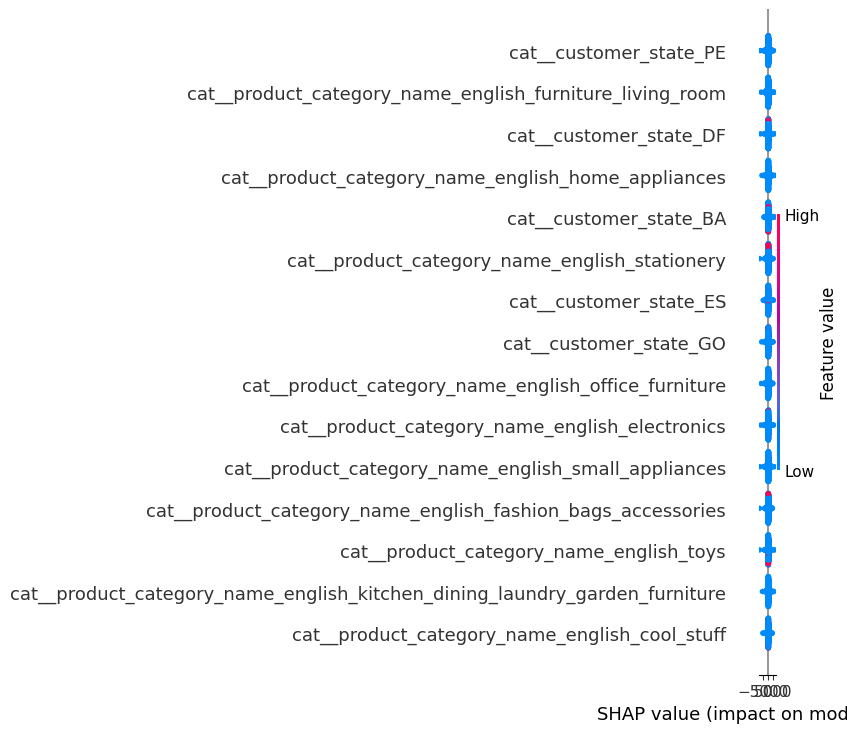

In [ ]:
# --- SHAP 분석 (최신 안정 버전) ---
X_train_sample = shap.sample(X_train_processed_df, 2000, random_state=42)
explainer = shap.TreeExplainer(rf_classifier)

explanation = explainer(X_train_sample, check_additivity=False)

# SHAP 요약 플롯 시각화
print("\n--- SHAP Summary Plot (Stable Version) ---")
print("SHAP 그래프를 생성 중입니다...")

shap.summary_plot(explanation[:,:,1], X_train_sample, max_display=15)

--- SHAP Summary Plot (Bar Chart - Stable Version) ---


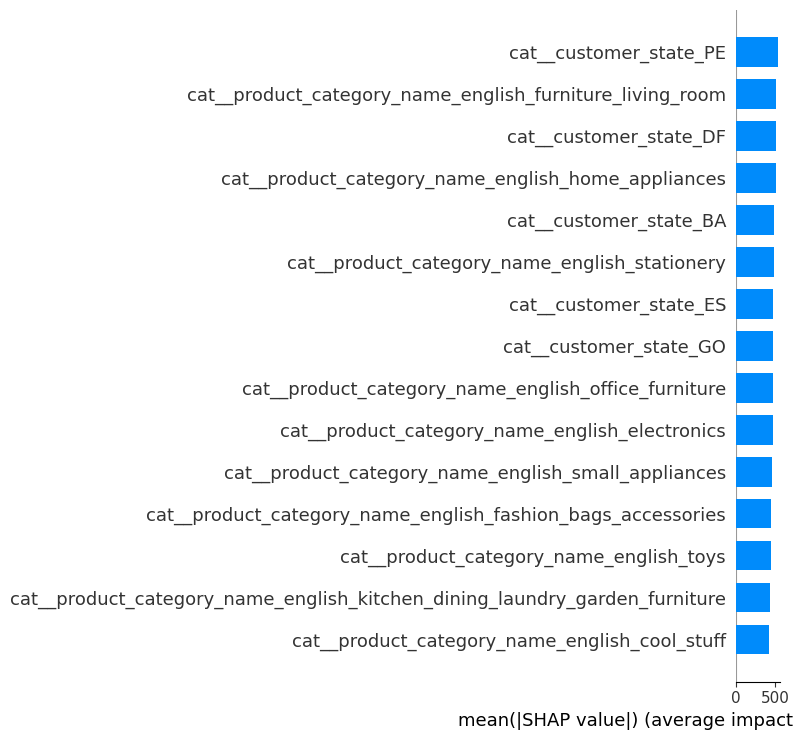

In [ ]:
# SHAP 요약 플롯 (막대그래프 버전 - 최신 안정 코드)
print("--- SHAP Summary Plot (Bar Chart - Stable Version) ---")

shap.summary_plot(explanation[:,:,1], plot_type="bar", max_display=15)


--- SHAP Scatter Plot for 'num__payment_value' ---


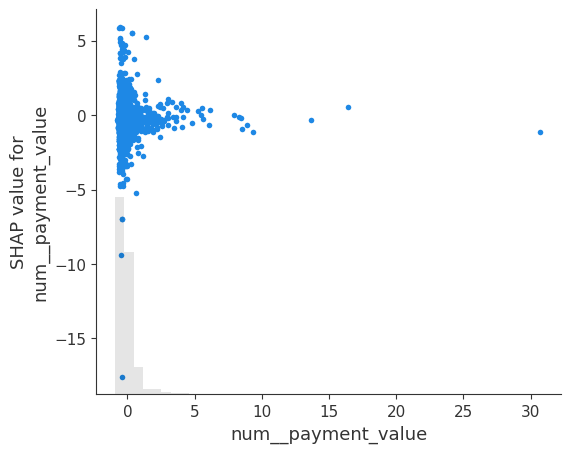


--- SHAP Scatter Plot for 'num__payment_installments' ---


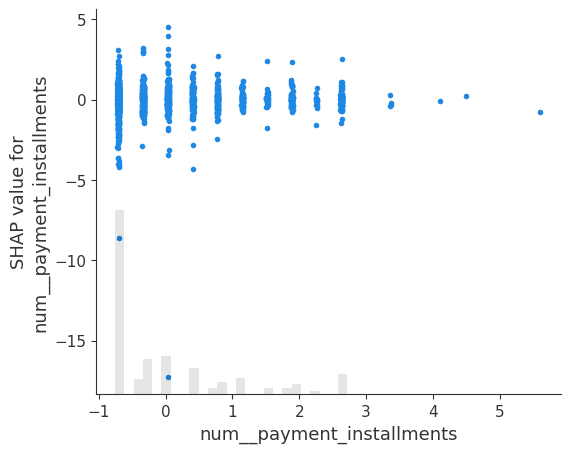

In [ ]:
# SHAP 의존성 플롯 -> 최신 버전에서는 scatter 플롯을 사용합니다.
print("\n--- SHAP Scatter Plot for 'num__payment_value' ---")

shap.plots.scatter(explanation[:, "num__payment_value", 1])

print("\n--- SHAP Scatter Plot for 'num__payment_installments' ---")

shap.plots.scatter(explanation[:, "num__payment_installments", 1])

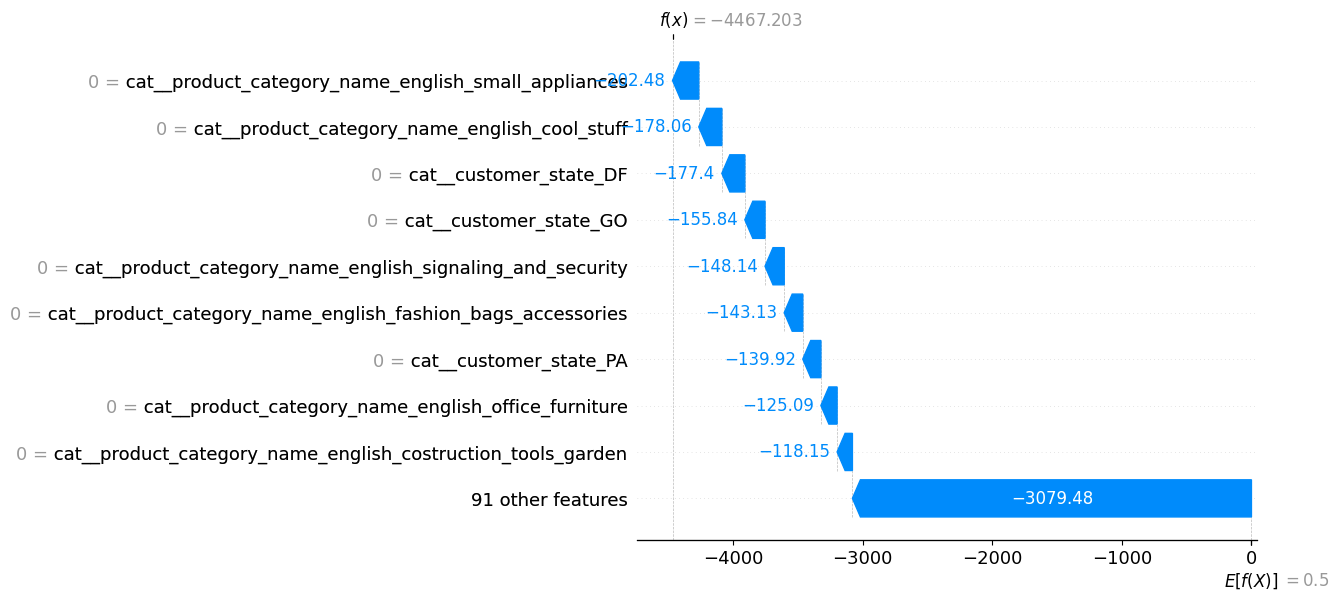

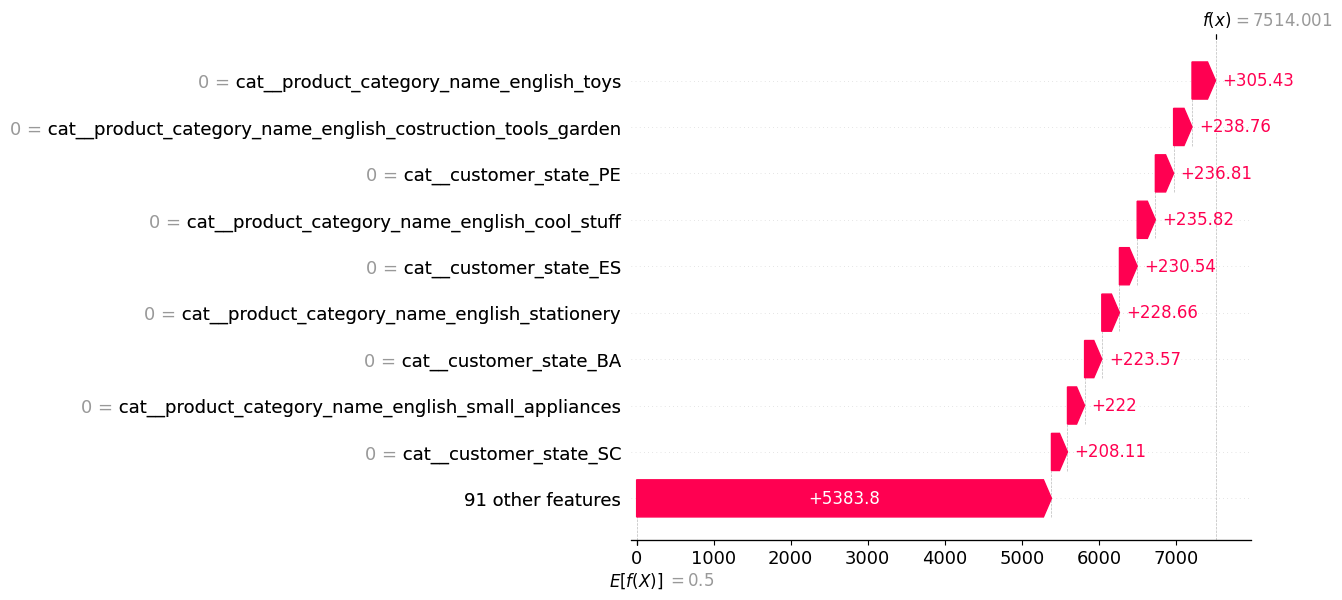

In [27]:
# 재구매했다고 예측된 고객 중 한 명(예: 0번 샘플) 선택
shap.plots.waterfall(explanation[0, :, 1], max_display=10)

# 재구매 안 했다고 예측된 고객 중 한 명(예: 1번 샘플) 선택
shap.plots.waterfall(explanation[1, :, 1], max_display=10)

---

# 15단계: 시뮬레이션 엔진(예측 함수) 만들기

In [ ]:
# --- 시뮬레이션 엔진 준비 ---
simulation_base_df = final_kpi_table.copy()

# 1. 고객 획득 비용(CAC) 설정 (리서치 기반)
# 2017-2018년 브라질 이커머스 평균 CAC인 약 30 헤알로 설정
CAC = 30 

# 2. 시뮬레이션 함수 정의 
def marketing_investment_simulator(category_name, investment_amount, kpi_df):
    """
    특정 카테고리에 주어진 예산을 투자했을 때의 예상 결과를 시뮬레이션하는 함수
    """
    category_data = kpi_df[kpi_df['product_category_name_english'] == category_name]
    
    if category_data.empty:
        return "선택한 카테고리 정보를 찾을 수 없습니다."
        
    conversion_rate = category_data['conversion_rate'].iloc[0]
    avg_ltv = category_data['avg_ltv'].iloc[0]
    
    estimated_new_customers = investment_amount / CAC
    estimated_loyal_customers = estimated_new_customers * conversion_rate
    estimated_total_ltv = estimated_new_customers * avg_ltv
    roi = (estimated_total_ltv - investment_amount) / investment_amount
    
    result = {
        "투자 카테고리": category_name,
        "총 마케팅 예산": f"{investment_amount:,.0f} 헤알",
        "예상 신규 고객": f"{estimated_new_customers:,.0f} 명",
        "예상 충성 고객(재구매자)": f"{estimated_loyal_customers:,.1f} 명",
        "예상 총 미래 가치(LTV)": f"{estimated_total_ltv:,.0f} 헤알",
        "예상 투자수익률(ROI)": f"{roi:.1%}"
    }
    
    return pd.DataFrame([result])

# --- 함수 테스트 ---
# 'health_beauty' 카테고리에 100,000 헤알을 투자한다고 가정
print("--- 시뮬레이션 테스트 결과 (현실화된 CAC 적용) ---")
simulation_result = marketing_investment_simulator('health_beauty', 100000, simulation_base_df)
print(simulation_result.T)

# 'computers' 카테고리에 동일한 금액을 투자한다고 가정
simulation_result_2 = marketing_investment_simulator('computers', 100000, simulation_base_df)
print("\n")
print(simulation_result_2.T)

--- 시뮬레이션 테스트 결과 (현실화된 CAC 적용) ---
                             0
투자 카테고리          health_beauty
총 마케팅 예산            100,000 헤알
예상 신규 고객               3,333 명
예상 충성 고객(재구매자)          90.2 명
예상 총 미래 가치(LTV)     646,384 헤알
예상 투자수익률(ROI)           546.4%


                            0
투자 카테고리             computers
총 마케팅 예산           100,000 헤알
예상 신규 고객              3,333 명
예상 충성 고객(재구매자)         19.3 명
예상 총 미래 가치(LTV)  5,222,932 헤알
예상 투자수익률(ROI)         5122.9%


# 16단계: Streamlit

In [36]:
import pandas as pd
from scipy.spatial import cKDTree
from geopy.distance import great_circle

# --- 데이터 로딩 ---
customers = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_customers_dataset.csv')
sellers = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_sellers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_geolocation_dataset.csv')

# --- 데이터 전처리 ---
# 1. Geolocation 데이터에서 zip_code_prefix별 평균 위도/경도 계산
geo_avg = geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

# 2. 고객 데이터와 판매자 데이터에 위도/경도 정보 결합
customers_geo = pd.merge(customers, geo_avg, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
sellers_geo = pd.merge(sellers, geo_avg, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# 3. 계산에 필요한 컬럼만 추출하고 중복 제거
customer_coords = customers_geo[['customer_unique_id', 'customer_state', 'geolocation_lat', 'geolocation_lng']].drop_duplicates(subset=['customer_unique_id'])
seller_coords = sellers_geo[['seller_id', 'geolocation_lat', 'geolocation_lng']].drop_duplicates(subset=['seller_id'])

print("데이터 준비 완료. 최근접 판매자 거리 계산을 시작합니다. (몇 분 정도 소요될 수 있습니다...)")

# --- 최근접 판매자 거리 계산 ---
# 1. 판매자 위치 좌표 배열 생성
seller_points = seller_coords[['geolocation_lat', 'geolocation_lng']].values

# 2. KD-Tree를 사용하여 빠른 검색 구조 생성
kdtree = cKDTree(seller_points)

# 3. 각 고객 위치에서 가장 가까운 판매자의 인덱스를 찾음
# k=1은 가장 가까운 1개를 의미
distances, indices = kdtree.query(customer_coords[['geolocation_lat', 'geolocation_lng']].values, k=1)

# 4. 가장 가까운 판매자의 좌표를 고객 데이터에 추가
nearest_seller_points = seller_points[indices]
customer_coords['nearest_seller_lat'] = nearest_seller_points[:, 0]
customer_coords['nearest_seller_lng'] = nearest_seller_points[:, 1]

# 5. 각 고객과 가장 가까운 판매자 간의 실제 거리(km) 계산
customer_coords['distance_to_seller_km'] = customer_coords.apply(
    lambda row: great_circle(
        (row['geolocation_lat'], row['geolocation_lng']),
        (row['nearest_seller_lat'], row['nearest_seller_lng'])
    ).kilometers,
    axis=1
)

print("거리 계산 완료. 주(State)별 평균 거리 집계를 시작합니다.")

# --- 주(State)별 평균 물류 거리 계산 및 저장 ---
state_logistics_df = customer_coords.groupby('customer_state')['distance_to_seller_km'].mean().reset_index()
state_logistics_df.rename(columns={'distance_to_seller_km': 'avg_distance_to_seller_km'}, inplace=True)

# CSV 파일로 저장
state_logistics_df.to_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\state_logistics_data.csv', index=False)

print("\n'state_logistics_data.csv' 파일 저장이 완료되었습니다!")
print(state_logistics_df.head())

데이터 준비 완료. 최근접 판매자 거리 계산을 시작합니다. (몇 분 정도 소요될 수 있습니다...)
거리 계산 완료. 주(State)별 평균 거리 집계를 시작합니다.

'state_logistics_data.csv' 파일 저장이 완료되었습니다!
  customer_state  avg_distance_to_seller_km
0             AC                  35.761812
1             AL                  96.791295
2             AM                  17.684555
3             AP                 818.318815
4             BA                  59.610861


In [57]:
import pandas as pd

# --- 1. 원본 CSV 파일에서 데이터 로딩 ---
print("원본 CSV 파일에서 데이터를 로딩합니다...")
orders = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_orders_dataset.csv')
order_items = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_order_items_dataset.csv')
products = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_products_dataset.csv')
customers = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\olist_customers_dataset.csv')
translation = pd.read_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\product_category_name_translation.csv')

# --- 2. 데이터 병합 (Merge) ---
print("데이터를 병합합니다...")
df = pd.merge(orders, order_items, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, customers, on='customer_id', how='left')
df = pd.merge(df, translation, on='product_category_name', how='left')

# --- 3. 분석에 필요한 데이터프레임 생성 및 정제 ---
print("분석용 데이터프레임을 생성하고 정제합니다...")
analysis_columns = [
    'customer_unique_id',
    'product_category_name_english', 
    'customer_state',
    'order_purchase_timestamp'
]
df_analysis = df[analysis_columns].copy()
df_analysis.dropna(inplace=True) # 결측치 제거

# --- 4. 'is_repeat' (재구매 여부) 변수 생성 ---
df_analysis['is_repeat'] = df_analysis.duplicated(subset=['customer_unique_id'], keep=False)

# --- 5. 첫 구매 데이터만 필터링 ---
df_analysis = df_analysis.sort_values('order_purchase_timestamp').drop_duplicates('customer_unique_id', keep='first')

# --- 6. 카테고리별/주별 충성 고객 수 계산 ---
print("카테고리별/주별 충성 고객 수를 계산합니다...")
# a. 재구매 고객(충성 고객) 데이터만 필터링
loyal_customers_df = df_analysis[df_analysis['is_repeat'] == True]

# b. 카테고리별, 주(State)별로 충성 고객 수를 집계
category_state_loyal_df = loyal_customers_df.groupby(
    ['product_category_name_english', 'customer_state']
).size().reset_index(name='loyal_customers')

# --- 7. CSV 파일로 저장 ---
category_state_loyal_df.to_csv(r'C:\Users\jso25\OneDrive\Desktop\EPOCH\final\data\category_state_loyal_customers.csv', index=False)

print("\n'category_state_loyal_customers.csv' 파일 저장이 완료되었습니다!")
print(category_state_loyal_df.head())

원본 CSV 파일에서 데이터를 로딩합니다...
데이터를 병합합니다...
분석용 데이터프레임을 생성하고 정제합니다...
카테고리별/주별 충성 고객 수를 계산합니다...

'category_state_loyal_customers.csv' 파일 저장이 완료되었습니다!
  product_category_name_english customer_state  loyal_customers
0    agro_industry_and_commerce             BA                2
1    agro_industry_and_commerce             CE                1
2    agro_industry_and_commerce             GO                1
3    agro_industry_and_commerce             MG                3
4    agro_industry_and_commerce             PR                1


app01 -> update : app04.py